# Confidence Interval and Hypothesis Testing with Python

In [48]:
import numpy as np
from scipy import stats

### EXERCISE 1. What is the normal body temperature for healthy humans? 
A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [12]:
# sample mean
x_bar = 98.25

# sample standard deviation
s = 0.73

# sample size
n = 130

# degrees of freedom
df = n - 1

# t-value for 99% confidence level and 129 degrees of freedom
t_value = stats.t.ppf(0.995, df)

# margin of error
moe = t_value * (s / np.sqrt(n))

# confidence interval
ci = (x_bar - moe, x_bar + moe)

print(f"The 99% confidence interval for the average body temperature of healthy people is {ci}.")

The 99% confidence interval for the average body temperature of healthy people is (98.08260738705933, 98.41739261294067).


### EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [13]:
# sample mean
x_bar = 5.4

# sample standard deviation
s = 3.1

# sample size
n = 500

# degrees of freedom
df = n - 1

# t-value for 99% confidence level and 129 degrees of freedom
t_value = stats.t.ppf(0.995, df)

# margin of error
moe = t_value * (s / np.sqrt(n))

# confidence interval
ci = (x_bar - moe, x_bar + moe)

print(f"The 99% confidence interval for the average body temperature of healthy people is {ci}.")

The 99% confidence interval for the average body temperature of healthy people is (5.041525888376247, 5.7584741116237534).


## HYPOTHESIS TESTING

### EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [17]:
# population parameters
mu = 13.2
sigma = 2.5

# sample statistics
n = 40
x_bar = 12.2
α = 0.01

# degrees of freedom
df = n - 1

# H0 = The company can be accused
# H1 = The company cannot be accused

# t-value for 99% confidence level and 39 degrees of freedom
t_value = stats.t.ppf(0.01, df)

# test statistic
t = (x_bar - mu) / (sigma / np.sqrt(n))

# p-value
p = stats.t.cdf(t, df)

if t < t_value:
    print("The company can be accused of paying substandard wages.")
else:
    print("The company cannot be accused of paying substandard wages.")

print(f"t = {t}, p = {p}")

The company can be accused of paying substandard wages.
t = -2.5298221281347035, p = 0.0077816812266594355


### EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils are below.

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [24]:
# two-sample t-test
# H0 = the population means are equal 
# H1 = the population means are not equal
Soil1 = [1.442, 1.943, 1.11, 1.912, 1.553, 1.641, 1.499, 1.347, 1.685, 1.578, 1.866, 1.653, 1.665, 1.64, 1.976, 1.754, 1.589, 1.976, 1.863, 1.932, 1.57, 1.613, 2.054, 1.55, 1.714, 1.896, 1.737, 1.74, 1.708, 1.548]
Soil2 = [1.364, 1.878, 1.337, 1.828, 1.371, 1.428, 1.119, 1.373, 1.589, 1.714, 1.26, 1.492, 1.395, 1.778, 1.611, 1.202, 1.542, 1.094, 1.557, 1.053, 1.183, 1.367, 1.144, 1.151, 1.561, 1.192, 1.489, 1.379, 1.501, 1.277, 1.593, 1.172, 1.51, 1.74, 1.355]
α = 0.01
x1_bar = sum(Soil1) / len(Soil1)
x2_bar = sum(Soil2) / len(Soil2)

s1 = np.sqrt(sum((x - x1_bar)**2 for x in Soil1) / (len(Soil1) - 1))
s2 = np.sqrt(sum((x - x2_bar)**2 for x in Soil2) / (len(Soil2) - 1))

n1 = len(Soil1)
n2 = len(Soil2)

df = n1 + n2 - 2

# t-value for 99% confidence level and 38 degrees of freedom
t_value = stats.t.ppf(0.995, df)

# test statistic
t = (x1_bar - x2_bar) / np.sqrt(s1**2/n1 + s2**2/n2)

if t < -t_value or t > t_value:
    print("The soils appear to differ with respect to average shear strength at the 1% significance level.")
else:
    print("The soils do not appear to differ with respect to average shear strength at the 1% significance level.")

print(f"x1_bar = {x1_bar}")
print(f"x2_bar = {x2_bar}")
print(f"s1 = {s1}")
print(f"s2 = {s2}")
print(f"n1 = {n1}")
print(f"n2 = {n2}")
print(f"df = {df}")
print(f"t = {t}, p = {p}")

The soils appear to differ with respect to average shear strength at the 1% significance level.
x1_bar = 1.6918
x2_bar = 1.4171142857142855
s1 = 0.20690284243310078
s2 = 0.2191842860711146
n1 = 30
n2 = 35
df = 63
t = 5.191460504717391, p = 0.0077816812266594355


### EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [26]:
import pandas as pd

df = pd.read_excel(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\Statistics\2015_PISA.xlsx")

In [27]:
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [30]:
continent_stats = df.groupby("Continent_Code")["Math"].describe()
continent_stats

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [40]:
eu_as_mean = continent_stats["mean"].iloc[1:3]
eu_as_mean

Continent_Code
AS    466.216647
EU    477.981449
Name: mean, dtype: float64

There is no significant difference in the average math scores between EU and AS countries.


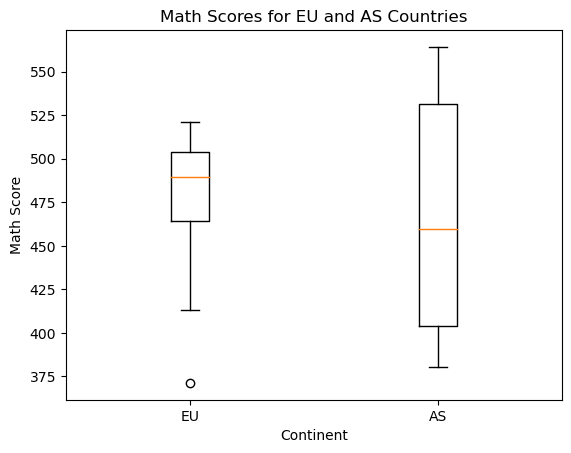

In [51]:
# two-sample t-test
eu_data = df[df["Continent_Code"] == "EU"]["Math"]
as_data = df[df["Continent_Code"] == "AS"]["Math"]

# perform two-sample t-test
t, p = stats.ttest_ind(eu_data, as_data, equal_var=True)

# print the results
if p < 0.05:
    print("There is a significant difference in the average math scores between EU and AS countries.")
else:
    print("There is no significant difference in the average math scores between EU and AS countries.")

# draw side-by-side box plots
import matplotlib.pyplot as plt
data = [eu_data, as_data]
labels = ["EU", "AS"]
plt.boxplot(data, labels=labels)
plt.xlabel("Continent")
plt.ylabel("Math Score")
plt.title("Math Scores for EU and AS Countries")
plt.show()

### EXERCISE 6: Check if the variables are dependent or independent

In [ ]:
# Importing reelating libraries; Pandas, Numpy, scipy.stats

import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
table = [[15, 21, 45, 13], [26, 31, 34, 5], [33, 17, 49, 20]]
table

[[15, 21, 45, 13], [26, 31, 34, 5], [33, 17, 49, 20]]

**Stating the null (H0) & alternative hypothesis (Ha):**

In [ ]:
# Ho: The two categorical variables are independent.
# Ha: The two categorical variables are dependent.

**Calculating Test Statistic & p-value:**

In [ ]:
stat, p, dof, expected = chi2_contingency(table)

In [ ]:
stat, p, dof, expected

(19.177972167356753,
 0.0038733888380696486,
 6,
 array([[22.51132686, 20.99029126, 38.93851133, 11.55987055],
        [22.99029126, 21.4368932 , 39.76699029, 11.80582524],
        [28.49838188, 26.57281553, 49.29449838, 14.63430421]]))

**Making a decision:**

In [ ]:
print('stat=%.3f, p=%.4f' % (stat, p))

if p > 0.05:
    print('Fail to reject Ho')
else:
    print('We reject the null hypothesis. The two categorical variables are dependent.')

stat=19.178, p=0.0039
We reject the null hypothesis. The two categorical variables are dependent.


In [ ]:
expected

array([[22.51132686, 20.99029126, 38.93851133, 11.55987055],
       [22.99029126, 21.4368932 , 39.76699029, 11.80582524],
       [28.49838188, 26.57281553, 49.29449838, 14.63430421]])

In [ ]:
dof

6

In [ ]:
# We can get the same result with manual method

from scipy import stats

1 - stats.chi2.cdf(19.178, 6)

0.0038733450260066693

### EXERCISE 7:  Titanic Dataset: Does gender affects survival?

In [ ]:
#sns.get_dataset_names()

In [ ]:
titanic = sns.load_dataset("titanic")

titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
716,1,1,female,38.0,0,0,227.5250,C,First,woman,False,C,Cherbourg,yes,True
694,0,1,male,60.0,0,0,26.5500,S,First,man,True,NaN,Southampton,no,True
657,0,3,female,32.0,1,1,15.5000,Q,Third,woman,False,NaN,Queenstown,no,False
451,0,3,male,NaN,1,0,19.9667,S,Third,man,True,NaN,Southampton,no,False
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
784,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
373,0,1,male,22.0,0,0,135.6333,C,First,man,True,NaN,Cherbourg,no,True
779,1,1,female,43.0,0,1,211.3375,S,First,woman,False,B,Southampton,yes,False
658,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


**How many rows and columns we have in Titanic Dataset?**

In [ ]:
titanic.shape

(891, 15)

**How many null values are there in the features/columns?**

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.drop(["deck", "age"], axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
titanic = titanic.dropna()
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   sibsp        889 non-null    int64   
 4   parch        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(5)
memory usage: 79.1+ KB


In [ ]:
titanic2 = titanic.sample(200, random_state=42)
titanic2

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
281,0,3,male,0,0,7.8542,S,Third,man,True,Southampton,no,True
435,1,1,female,1,2,120.0000,S,First,child,False,Southampton,yes,False
39,1,3,female,1,0,11.2417,C,Third,child,False,Cherbourg,yes,False
418,0,2,male,0,0,13.0000,S,Second,man,True,Southampton,no,True
585,1,1,female,0,2,79.6500,S,First,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,1,male,0,0,26.5500,S,First,man,True,Southampton,no,True
478,0,3,male,0,0,7.5208,S,Third,man,True,Southampton,no,True
780,1,3,female,0,0,7.2292,C,Third,child,False,Cherbourg,yes,True
724,1,1,male,1,0,53.1000,S,First,man,True,Southampton,yes,False


In [ ]:
# Ho: The two categorical variables (sex & survived) are independent. Gender does not affect survival

# H1: The two categorical variables (sex & survived) are dependent. Gender affects

**Creating a Cross-Tabulation (contingency table):**

In [ ]:
# Both male and female survivors can be examined using a crosstab

crosstab = pd.crosstab(titanic2.survived, titanic2.sex)
crosstab

sex,female,male
survived,,
0,24,101
1,56,19


**Calculating Test Statistic & p-value:**

In [ ]:
from scipy import stats

stat, p, dof, expected = chi2_contingency(crosstab)

print('stat=%.3f, p=%.4f' % (stat, p))

stat=57.800, p=0.0000


**Making a decision:**

In [ ]:
alpha = 0.01

if p < alpha:
    print('At {} level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and \nit can be concluded that two categorical variables {} and {} are statistically dependent.'.format(alpha, crosstab.index.names, crosstab.columns.names))
else:
    print('At {} level of significance, we FAIL to REJECT the Null Hypothesis (H0)and \nit can be concluded that two categorical variables {} and {} are statistically independent.'.format(alpha, crosstab.index.names, crosstab.columns.names))

At 0.01 level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and 
it can be concluded that two categorical variables ['survived'] and ['sex'] are statistically dependent.


### EXERCISE 8: Does the type of class affect survival? In other words, Class and survived variables are dependent or not?

In [ ]:
# Ho: The two categorical variables (class & survived) are independent.

# Ha: The two categorical variables (class & survived) are dependent.

In [ ]:
# Both male and female survivors can be examined using a crosstab

crosstab = pd.crosstab(titanic2["survived"], titanic2["class"])
crosstab

class,First,Second,Third
survived,,,
0,16,27,82
1,32,18,25


**Calculating Test Statistic & p-value:**

In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab)

print('stat=%.3f, p=%.4f' % (stat, p))

stat=26.664, p=0.0000


**Making a decision:**

In [ ]:
alpha = 0.05

if p < alpha:
    print('At {} level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and \nit can be concluded that two categorical variables {} and {} are statistically dependent.'.format(alpha, crosstab.index.names, crosstab.columns.names))
else:
    print('At {} level of significance, we FAIL to REJECT the Null Hypothesis (H0)and \nit can be concluded that two categorical variables {} and {} are statistically independent.'.format(alpha, crosstab.index.names, crosstab.columns.names))

At 0.05 level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and 
it can be concluded that two categorical variables ['survived'] and ['class'] are statistically dependent.


### EXERCISE 9: Does the place where passangers embarked affect the type of class? In other words, embarked and class variables are dependent or not?

In [ ]:
# Ho: The two categorical variables (embarked & class) are independent.

# H1: The two categorical variables (embarked & class) are dependent.

**Creating a Cross-Tabulation (contingency table):**

In [ ]:
crosstab = pd.crosstab(titanic2["class"], titanic2["embarked"])
crosstab

embarked,C,Q,S
class,,,
First,21,1,26
Second,2,2,41
Third,15,12,80


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab)
stat, p, dof, expected

(30.660604281063144,
 3.5902822709677466e-06,
 4,
 array([[ 9.12 ,  3.6  , 35.28 ],
        [ 8.55 ,  3.375, 33.075],
        [20.33 ,  8.025, 78.645]]))

**Calculating Test Statistic & p-value:**

In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab)

print('stat=%.3f, p=%.4f' % (stat, p))

stat=30.661, p=0.0000


**Making a decision:**

In [ ]:
alpha = 0.05

if p < alpha:
    print('At {} level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and \nit can be concluded that two categorical variables {} and {} are statistically dependent.'.format(alpha, crosstab.index.names, crosstab.columns.names))
else:
    print('At {} level of significance, we FAIL to REJECT the Null Hypothesis (H0)and \nit can be concluded that two categorical variables {} and {} are statistically independent.'.format(alpha, crosstab.index.names, crosstab.columns.names))

At 0.05 level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and 
it can be concluded that two categorical variables ['class'] and ['embarked'] are statistically dependent.


### EXERCISE 10: Tips dataset: Are day and sex variables statistically dependent / correlated?

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
crosstab = pd.crosstab(df["day"], df["sex"])
crosstab

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab)
stat, p, dof, expected

(13.222001372406607,
 0.004180302092822261,
 3,
 array([[39.89344262, 22.10655738],
        [12.22540984,  6.77459016],
        [55.9795082 , 31.0204918 ],
        [48.90163934, 27.09836066]]))

In [ ]:
alpha = 0.05

if p < alpha:
    print('At {} level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and \nit can be concluded that two categorical variables {} and {} are statistically dependent.'.format(alpha, crosstab.index.names, crosstab.columns.names))
else:
    print('At {} level of significance, we FAIL to REJECT the Null Hypothesis (H0)and \nit can be concluded that two categorical variables {} and {} are statistically independent.'.format(alpha, crosstab.index.names, crosstab.columns.names))

At 0.05 level of significance, we can REJECT the Null Hypothesis (H0) in favor of Alternative hypothesis (Ha) and 
it can be concluded that two categorical variables ['day'] and ['sex'] are statistically dependent.


END OF THE PROJECT